Sophia Walton
CS 3501
Homework 3

1. Answer the following questions about these two vectors. Don’t just give a number - make
sure to write out all steps for your solutions, otherwise you may receive partial scores. (Your
steps can be Python code!)
v = \begin{pmatrix} 15 \\ 34 \\ 18 \\ 22 \end{pmatrix}

,w = \begin{pmatrix} 1 \\ 3 \\ 2 \\ 7 \end{pmatrix}


(a) What are the norms $\lVert$v$\rVert$, $\lVert$w$\rVert$ ? 


$\lVert$x$\rVert$ = $\sqrt{\sum_{i=1}^{n} x^2 }$

$\lVert$v$\rVert$ = $\sqrt{15^2 + 34^2 + 18^2 + 22^2}$

= $\sqrt{225 + 1156 + 324 + 484}$

= $\sqrt{2189}$

= 46.79

$\lVert$w$\rVert$ = $\sqrt{1^2 + 3^2 + 2^2 + 7^2}$

= $\sqrt{1 + 9 + 4 + 49}$

= $\sqrt{63}$

= 7.94

(b) What is the dot product <v * w>?

<x * i > = \begin{pmatrix} v_1*w_1$ & v_2*w_2 & v_3*w_3 & v_4*w_4 \end{pmatrix}

= \begin{pmatrix} 15*1 & 34*3 & 18*2 & 22*7 \end{pmatrix}

= \begin{pmatrix} 15 & 102 & 36 & 154 \end{pmatrix}

(c) What is the distance between v and w as points?

d =  $\sqrt{\sum_{i=1}^{n} (x_i-y_i)^2 }$

= $\sqrt{(15-1)^2 + (34-3)^2 + (18-2)^2 + (22-7)^2}$

= $\sqrt{14^2 + 31^2 + 16^2 + 15^2}$

= $\sqrt{196+ 961 + 256 + 225}$

= $\sqrt{1638}$

= 40.47

(d) What is the projection of v onto w? (looking for a vector here)

unit vector of \begin{pmatrix} \frac{1}{\sqrt{63}} & \frac{3}{\sqrt{63}} & \frac{2}{\sqrt{63}} & \frac{7}{\sqrt{63}} \end{pmatrix}

v proj w = \begin{pmatrix} \frac{15*1}{\sqrt{63}} & \frac{34*3}{\sqrt{63}} & \frac{18*2}{\sqrt{63}} & \frac{22*7}{\sqrt{63}} \end{pmatrix}

= \begin{pmatrix} \frac{15}{\sqrt{63}} & \frac{102}{\sqrt{63}} & \frac{36}{\sqrt{63}} & \frac{154}{\sqrt{63}} \end{pmatrix}

2. In this problem we will be analyzing data from the Old Faithful geyser in Yellowstone National
Park. (See https://en.wikipedia.org/wiki/Old_Faithful to learn more!) Download the
CSV of the data from the class schedule page. The data consists of two variables: the duration
of eruptions in minutes (eruptions column) and the length of time until the next eruption
(waiting column). Hint: The function numpy.asarray() can convert a pandas column into
a numpy array.

(a) Load the eruptions column as your x variable and the waiting column as your y
variable. Plot the data with a scatter plot. Do you think there is a relationship between
eruption time and waiting time?

In [1]:
# import statements
import pandas 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#load csv 
csvoldfaithful = pandas.read_csv("/Users/sophiawalton/Desktop/CS3501/Homework3/faithful.csv")

#create data frame 
oldfaithfuldf = pandas.DataFrame(csvoldfaithful)

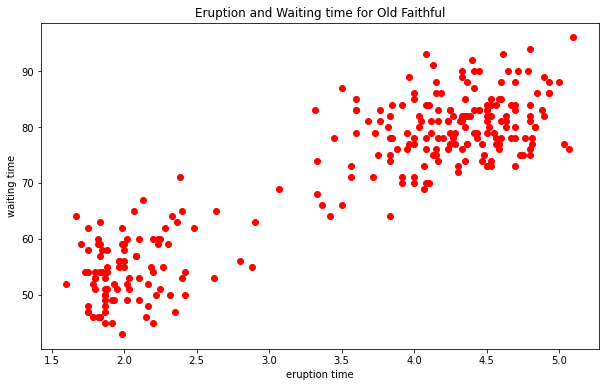

In [3]:
#plot datapoints 
fig, before = plt.subplots(figsize=(10, 6))

before.scatter(x = oldfaithfuldf['eruptions'], y = oldfaithfuldf['waiting'], color ='red')
plt.xlabel("eruption time")
plt.ylabel("waiting time")
plt.title("Eruption and Waiting time for Old Faithful")

plt.show()

It appears that there is a correlation between eruption time and waiting time: the longer the waiting time, the longer the corresponding eruption, and vice-versa. 

(b) What is the mean of the eruption time? What is the mean of the waiting time? Use
these values to center your x and y data

In [4]:
#convert to series to find average
eruptiontime=pandas.Series(data=oldfaithfuldf['eruptions'])
waitingtime=pandas.Series(data=oldfaithfuldf['waiting'])

#find averages 
emean = eruptiontime.mean()
wmean = waitingtime.mean()

#print 
print("eruption time mean:", emean)
print("waiting time mean: ", wmean)

eruption time mean: 3.4877830882352936
waiting time mean:  70.8970588235294


(c) Using the dot product formula we discussed in class, compute the correlation of eruption
and waiting time. Does the value (and sign) of the correlation match what you would
expect from the plot?

In [5]:
times = np.empty([len(eruptiontime)])
#create a series of the dot products
elen = 0 
wlen = 0
for i in range (0, len(eruptiontime), 1):
    esquared = (eruptiontime.at[i]-emean)**2
    wsquared =(waitingtime.at[i]-wmean)**2
    elen+=esquared
    wlen+=wsquared
elen = elen**0.5
wlen = wlen**0.5

for i in range (0, len(eruptiontime), 1):
    etime = eruptiontime.at[i]-emean
    wtime = waitingtime.at[i]-wmean
    newtime = (etime * wtime)
    times[i]=newtime

timesum = (np.sum(times))/(elen*wlen)
print("r =", timesum)

r = 0.9008111683218134


This makes sense because there is definitely a positive correlation between the two, but it is not very steep due to the relative strength of the two markers. 

(d) Using the formulas from lecture for ˆα and βˆ, compute the intercept and slope for a linear
regression. Now plot a scatterplot with your regression line on top of it. How does the
value and the sign of the slope compare to the correlation?

In [6]:
#calculate beta
timeone = np.empty([len(eruptiontime)])
timetwo = np.empty([len(eruptiontime)])
for i in range (0, len(eruptiontime), 1):
    etime = eruptiontime.at[i]-emean
    wtime = waitingtime.at[i]-wmean
    newtime = (etime * wtime)
    otime = etime**2
    timeone[i]=newtime
    timetwo[i]=otime
beta=np.sum(timeone)/np.sum(timetwo)
beta = beta.item()

#calculate alpha 
alpha = wmean - beta*(emean)

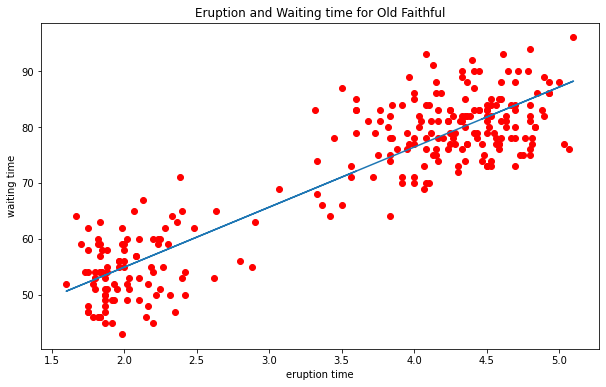

In [7]:
#draw scatterplot 

#convert df to np array 
x = oldfaithfuldf['eruptions'].to_numpy()

y = oldfaithfuldf['waiting'].to_numpy()

#plot datapoints 
fig, regression = plt.subplots(figsize=(10, 6))

regression.plot(x, y, color ='red', marker = 'o', linestyle = 'None')

plt.plot(x, beta*x + alpha)

plt.xlabel("eruption time")
plt.ylabel("waiting time")
plt.title("Eruption and Waiting time for Old Faithful")

plt.show()


(e) Say you are watching the Old Faithful geyser, and you time an eruption to be 2.2
minutes. Based on your regression analysis, how long should you expect to wait for the
next eruption?

In [8]:
time = beta*2.2+alpha
print(time, "minutes")

57.07960809204711 minutes


(f) Using the formula for the R2
statistic from class, what is the proportion of variance
explained by your regression?

In [53]:
#make a list of the errors 
errors = np.empty([len(eruptiontime)])
waverage = np.empty([len(eruptiontime)])

for i in range (0, len(eruptiontime), 1):
    wtime = waitingtime.at[i]-wmean
    error = (alpha + beta*eruptiontime.at[i]-waitingtime.at[i])
    errors[i]=error**2
    waverage[i]=wtime**2



In [56]:
mysum = (np.sum(errors))/(np.sum(waverage))
mysum = 1-mysum
print(mysum)


0.8114607609733095


thus, 81.1 percent of variance is explained by this regression equation.